0
100
200
300
400
500
600
700
800
900


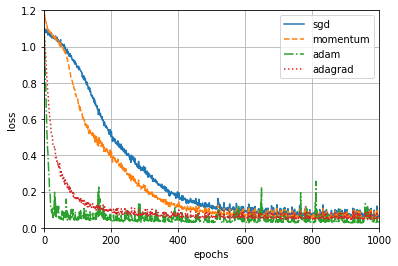

In [1]:
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch
import pandas as pd
import matplotlib.pyplot as plt

torch.manual_seed(777)

dataset = pd.read_csv('iris.csv').to_numpy()
x_tensor = torch.Tensor(dataset[:,0:-1])
y_tensor = torch.LongTensor(dataset[:,-1])
iris = TensorDataset(x_tensor, y_tensor)

test_set_size = int(len(iris)*0.2)
train_set_size = len(iris) - test_set_size

train_set, test_set = random_split(iris, 
                                   [train_set_size, 
                                    test_set_size])

BATSIZE = 50
train_loader = DataLoader(dataset=train_set,
                          batch_size=BATSIZE,
                          shuffle=True)
test_loader = DataLoader(dataset=test_set,
                          batch_size=test_set_size,
                          shuffle=False)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 3)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        z = self.fc4(x)
        
        return z

net_sgd = Net()
net_momentum = Net()
net_adam = Net()
net_adagrad = Net()

cel = torch.nn.CrossEntropyLoss()
optim_sgd = torch.optim.SGD(net_sgd.parameters(), lr=0.005)
optim_momentum = torch.optim.SGD(net_momentum.parameters(), lr=0.005, momentum=0.1)
optim_adam = torch.optim.Adam(net_adam.parameters(), lr=0.005)
optim_adagrad = torch.optim.Adagrad(net_adagrad.parameters(), lr=0.005)

loss_lst_sgd = []
loss_lst_momentum = []
loss_lst_adam = []
loss_lst_adagrad = []
EPOCH = 1000
for epoch in range(EPOCH):
    if epoch % 100 == 0: print(epoch)
    l_sum_sgd = 0
    l_sum_momentum = 0
    l_sum_adam = 0
    l_sum_adagrad = 0
    for data in train_loader:
        x, y = data
        z_sgd = net_sgd(x)
        z_momentum = net_momentum(x)
        z_adam = net_adam(x)
        z_adagrad = net_adagrad(x)
        loss_s = cel(z_sgd, y)
        loss_m = cel(z_momentum, y)
        loss_a = cel(z_adam, y)
        loss_ag = cel(z_adagrad, y)

        optim_sgd.zero_grad()
        optim_momentum.zero_grad()
        optim_adam.zero_grad()
        optim_adagrad.zero_grad()
        loss_s.backward()
        loss_m.backward()
        loss_a.backward()
        loss_ag.backward()
        optim_sgd.step()
        optim_momentum.step()
        optim_adam.step()
        optim_adagrad.step()
        l_sum_sgd += loss_s.item()
        l_sum_momentum += loss_m.item()
        l_sum_adam += loss_a.item()
        l_sum_adagrad += loss_ag.item()
    loss_lst_sgd.append(l_sum_sgd/len(train_loader))
    loss_lst_momentum.append(l_sum_momentum/len(train_loader))
    loss_lst_adam.append(l_sum_adam/len(train_loader))
    loss_lst_adagrad.append(l_sum_adagrad/len(train_loader))

plt.plot(range(EPOCH), loss_lst_sgd)
plt.plot(range(EPOCH), loss_lst_momentum, '--')
plt.plot(range(EPOCH), loss_lst_adam, '-.')
plt.plot(range(EPOCH), loss_lst_adagrad, ':')
plt.legend(('sgd', 'momentum','adam','adagrad'))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.axis((0,1000,0,1.2))
plt.savefig('fig_5_2_9.png', dpi=200)
# plt.show()